#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Ingest Data

data_credit = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-06-trees/CreditScoring.csv'

!wget $data_credit

!head CreditScoring.csv

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


#### Lowercase Column Names

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


#### Data Preparation

##### Categorical Features

levels(dd$Status) = c("good", "bad")

levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")

levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")

levels(dd$Records) = c("no_rec", "yes_rec")

levels(dd$Job) = c("fixed", "partime", "freelance", "others")

In [6]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [7]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [8]:
df.home.value_counts()

home
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: count, dtype: int64

In [9]:
# Map Home Values to Text Data

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'others',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [10]:
# Map Marital Values to Text Data

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [11]:
# Map Records

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [12]:
# Map Job

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [13]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


##### Numerical Features

In [14]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [15]:
df['income'].replace(to_replace=99999999.0, value=np.nan).max()

959.0

In [16]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999.0, value=np.nan)

In [17]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Previously, we found one 'unk' obs in Status. We remove the entry from the dataframe

In [18]:
df = df[df.status != 'unk']

In [19]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

#### Data Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = (df_train.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

In [24]:
del df_train['status']
del df_val['status']
del df_test['status']

In [25]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [26]:
len(y_train), len(y_test), len(y_test)

(2672, 891, 891)

#### Decision Trees

In [27]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        return 'default'

In [28]:
xi = df_train.iloc[0].to_dict()

In [29]:
assess_risk(xi)

'ok'

##### Using Sklearn

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer

In [31]:
train_dict = df_train.fillna(0).to_dict(orient='records')
val_dict = df_val.fillna(0).to_dict(orient='records')

In [32]:
dv = DictVectorizer(sparse=False)

In [33]:
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

Default Decision Tree with unlimited Depth

In [34]:
dt = DecisionTreeClassifier()

In [35]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print(f"Train auc: {auc}")

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print(f"Val auc: {auc}")

Train auc: 1.0
Val auc: 0.6591297134968879


Decision Tree with Restricted Depth using 'max_depth'

In [37]:
dt = DecisionTreeClassifier(max_depth=3)

In [38]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print(f"Train auc: {auc}")

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print(f"Val auc: {auc}")

Train auc: 0.7761016984958594
Val auc: 0.7389079944782155


##### Visualize the tree

In [40]:
from sklearn.tree import export_text, export_graphviz

In [41]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



In [42]:
from sklearn.tree import plot_tree

In [43]:
df_full_train.status.unique()

array(['ok', 'default'], dtype=object)

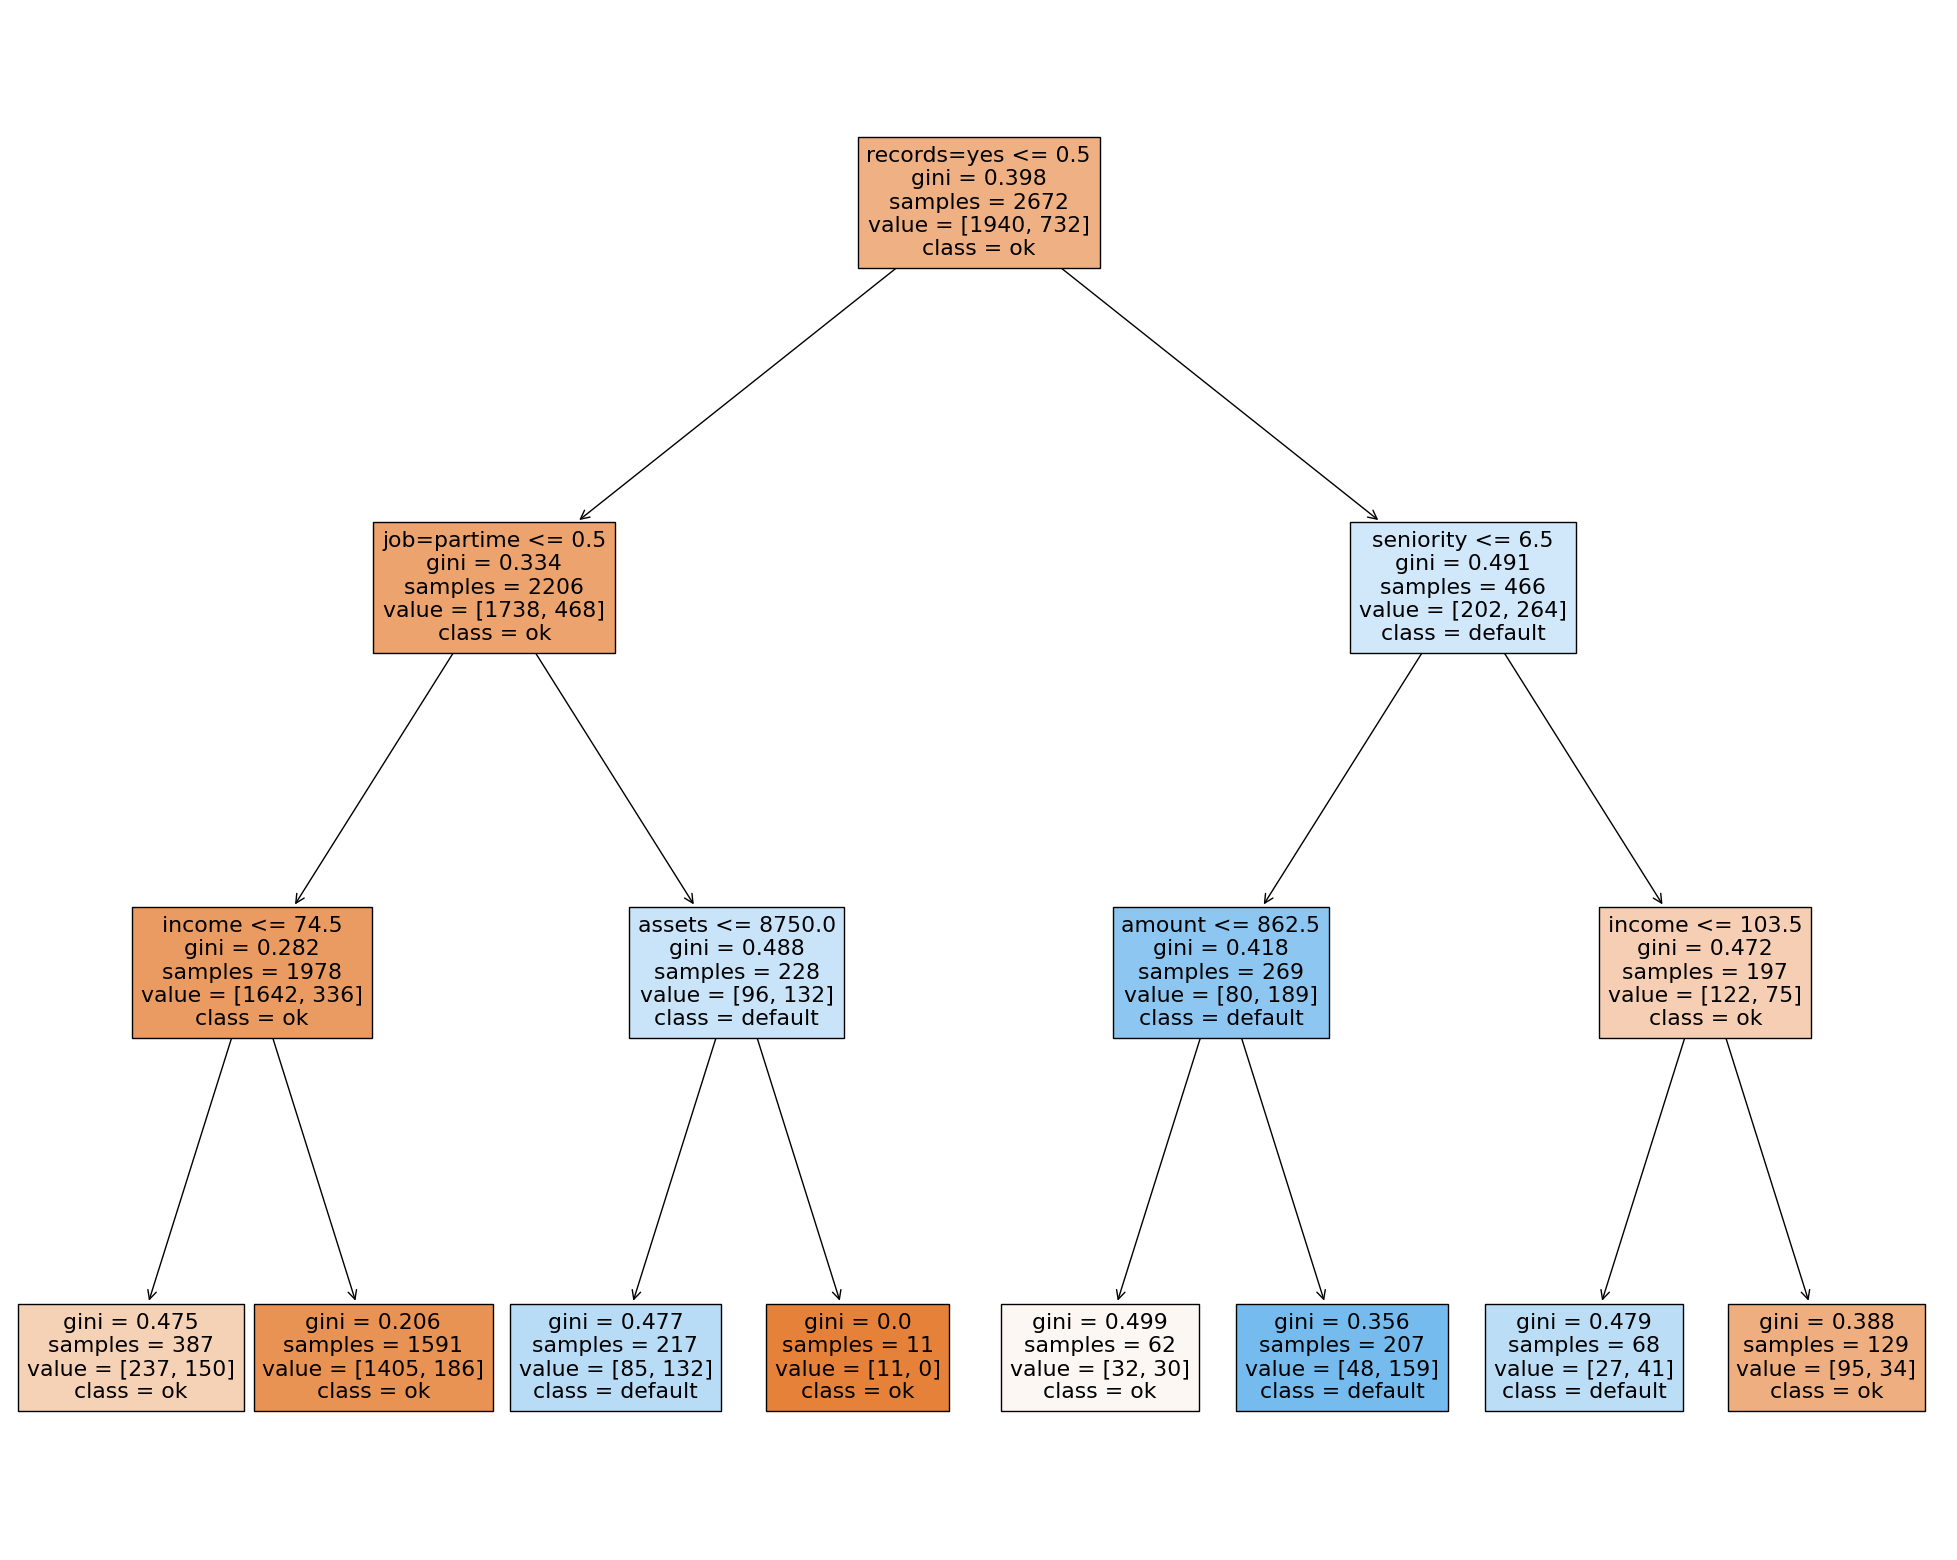

In [44]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt, 
              feature_names=list(dv.get_feature_names_out()), 
              class_names = list(df_full_train.status.unique()),
              filled=True)

#### Decision Tree Algorithm

In [45]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns = ['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [46]:
df_example = df_example.sort_values('assets').reset_index(drop=True)
df_example

,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


In [47]:
from IPython.display import display

In [48]:
observations = []

for t in [0, 2000, 3000, 4000, 5000, 8000]:
    df_left = df_example[df_example.assets <= t]
    df_right = df_example[df_example.assets > t]
    
    print(t)
    display(df_left)
    display(df_right)
    print()
    
    mis_rate_left = (df_left.status == 'ok').sum()/len(df_left)
#     display(mis_rate_left)
    mis_rate_right = (df_right.status == 'default').sum()/len(df_right)
#     display(mis_rate_right)
    
    avg_rate = (mis_rate_left + mis_rate_right)/2
    
    observations.append([t, 'default', round(mis_rate_left*100), 'ok', round(mis_rate_right*100), round(avg_rate*100)])
    
df_impurity = pd.DataFrame(observations, columns = ['assets_threshold', 
                                                   'left_split_pred',
                                                   'left_split_impurity', 
                                                   'right_split_pred', 
                                                   'right_split_impurity',
                                                   'average_impurity'])

0


,assets,debt,status
0,0,1000,default


,assets,debt,status
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok



2000


,assets,debt,status
0,0,1000,default
1,2000,1000,default


,assets,debt,status
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok



3000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default


,assets,debt,status
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok



4000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok


,assets,debt,status
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok



5000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok


,assets,debt,status
6,8000,3000,default
7,9000,500,ok



8000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default


,assets,debt,status
7,9000,500,ok


In [49]:
df_impurity

,assets_threshold,left_split_pred,left_split_impurity,right_split_pred,right_split_impurity,average_impurity
0,0,default,0,ok,43,21
1,2000,default,0,ok,33,17
2,3000,default,0,ok,20,10
3,4000,default,25,ok,25,25
4,5000,default,50,ok,50,50
5,8000,default,43,ok,0,21


In [50]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000],
}

In [51]:
for feature, Ts in thresholds.items():
    print("#"*40)
    print(feature)
    
    observations = []

    for t in Ts:
        if feature == 'assets':
            df_left = df_example[df_example[feature] <= t]
            df_right = df_example[df_example[feature] > t]
        else:
            df_left = df_example[df_example[feature] > t]
            df_right = df_example[df_example[feature] <= t]

        print(f"Threshold={t}")
        display(df_left)
        print(df_left['status'].value_counts(normalize=True))
        display(df_right)
        print(df_right['status'].value_counts(normalize=True))

        mis_rate_left = (df_left.status == 'ok').sum()/len(df_left)
    #     display(mis_rate_left)
        mis_rate_right = (df_right.status == 'default').sum()/len(df_right)
    #     display(mis_rate_right)

        avg_rate = (mis_rate_left + mis_rate_right)/2
        if feature == 'assets':
            observations.append([t, 'default', round(mis_rate_left*100), 'ok', round(mis_rate_right*100), round(avg_rate*100)])
        else:
            observations.append([t, 'default', round(mis_rate_right*100), 'ok', round(mis_rate_left*100), round(avg_rate*100)])
        
    df_impurity = pd.DataFrame(observations, columns = ['threshold', 
                                                       'left_split_pred',
                                                       'left_split_impurity', 
                                                       'right_split_pred', 
                                                       'right_split_impurity',
                                                       'average_impurity'])
    display(df_impurity)
    print("#"*40)

########################################
assets
Threshold=0


,assets,debt,status
0,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
Threshold=2000


,assets,debt,status
0,0,1000,default
1,2000,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
Threshold=3000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
Threshold=4000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default
7,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
Threshold=5000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
6,8000,3000,default
7,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
Threshold=8000


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
7,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,threshold,left_split_pred,left_split_impurity,right_split_pred,right_split_impurity,average_impurity
0,0,default,0,ok,43,21
1,2000,default,0,ok,33,17
2,3000,default,0,ok,20,10
3,4000,default,25,ok,25,25
4,5000,default,50,ok,50,50
5,8000,default,43,ok,0,21


########################################
########################################
debt
Threshold=500


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
6,8000,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
7,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64
Threshold=1000


,assets,debt,status
2,3000,2000,default
6,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,0,1000,default
1,2000,1000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
7,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
Threshold=2000


,assets,debt,status
6,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,0,1000,default
1,2000,1000,default
2,3000,2000,default
3,4000,1000,ok
4,5000,1000,ok
5,5000,1000,ok
7,9000,500,ok


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,threshold,left_split_pred,left_split_impurity,right_split_pred,right_split_impurity,average_impurity
0,500,default,0,ok,43,21
1,1000,default,33,ok,0,17
2,2000,default,43,ok,0,21


########################################


#### Hyperparamter Tuning for Decision Trees

In [52]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print("%4s -> %.3f" % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.750
  10 -> 0.686
  15 -> 0.670
  20 -> 0.668
None -> 0.663


In [53]:
for m in [1, 5, 10, 15, 20, 50, 100, 200]:
    dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=m)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%3s -> %.3f' % (m, auc))

  1 -> 0.761
  5 -> 0.761
 10 -> 0.761
 15 -> 0.764
 20 -> 0.761
 50 -> 0.753
100 -> 0.756
200 -> 0.747


In [54]:
scores = []

for m in [4, 5, 6]:

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((m, s, auc))

In [55]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 
                                            'min_sample_leaf',
                                            'auc'])
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_sample_leaf,auc
19,6,15,0.785095
18,6,10,0.778299
22,6,100,0.776434
20,6,20,0.773982
12,5,20,0.773537


In [56]:
df_scores_pivot = df_scores.pivot(index='min_sample_leaf',
                                  columns = 'max_depth',
                                  values = 'auc')
df_scores_pivot

max_depth,4,5,6
min_sample_leaf,,,
1,0.761283,0.766938,0.749564
5,0.761283,0.767755,0.762330
10,0.761283,0.761809,0.778299
15,0.763726,0.772723,0.785095
20,0.760910,0.773537,0.773982
50,0.753457,0.766753,0.771733
100,0.755937,0.763384,0.776434
200,0.747260,0.759073,0.768267


<Axes: xlabel='max_depth', ylabel='min_sample_leaf'>

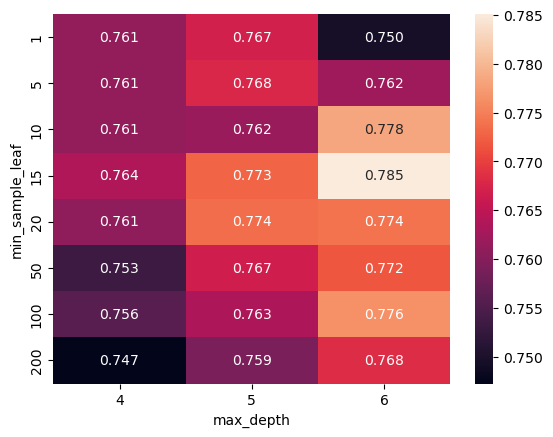

In [57]:
sns.heatmap(df_scores_pivot, annot=True, fmt = '.3f')

#### Ensemble Algorithms

##### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_estimators=10, random_state=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=50)

In [60]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.798097648397956

In [61]:
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

In [62]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append([n, auc])

In [63]:
df_rf_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_rf_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


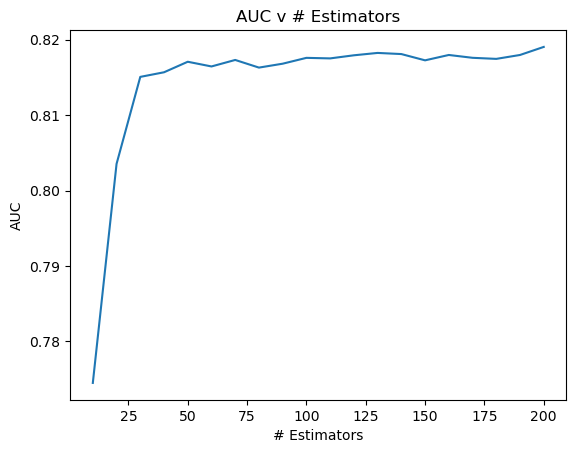

In [64]:
plt.plot(df_rf_scores.n_estimators, df_rf_scores.auc)
plt.xlabel("# Estimators")
plt.ylabel("AUC")
plt.title("AUC v # Estimators")
plt.show()

In [65]:
scores = []


for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append([d, n, auc])

In [66]:
df_rf_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_rf_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


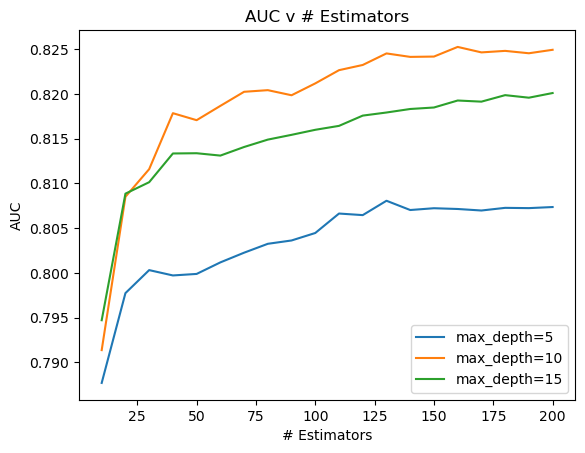

In [67]:
for d in [5, 10, 15]:
    df_subset = df_rf_scores[df_rf_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")

plt.xlabel("# Estimators")
plt.ylabel("AUC")
plt.title("AUC v # Estimators")
plt.legend()
plt.show()

In [68]:
max_depth = 10

In [69]:
scores = []


for l in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=l,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append([l, n, auc])

In [70]:
df_rf_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])
df_rf_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


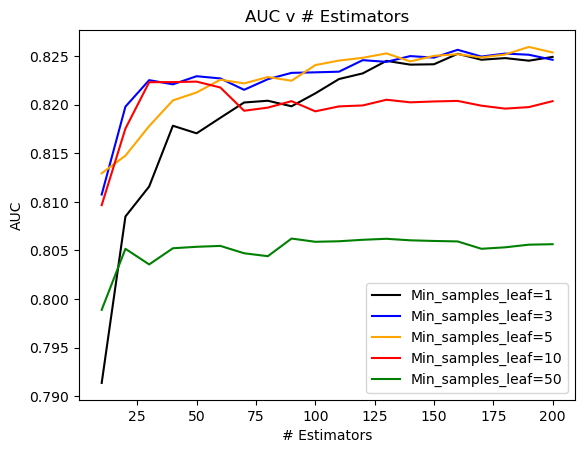

In [71]:
colors = ['black', 'blue', 'orange', 'red', 'green']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for l, color in zip(min_samples_leaf_values, colors):
    df_subset = df_rf_scores[df_rf_scores.min_samples_leaf == l]
    plt.plot(df_subset.n_estimators, df_subset.auc, color=color, label=f"Min_samples_leaf={l}")

plt.xlabel("# Estimators")
plt.ylabel("AUC")
plt.title("AUC v # Estimators")
plt.legend()
plt.show()

In [72]:
min_samples_leaf = 3

In [73]:
rf = RandomForestClassifier(n_estimators=100,
                            min_samples_leaf=min_samples_leaf,
                            max_depth=max_depth,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

In [74]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8233361991717324

##### Gradient Boosting and XGBoost

In [75]:
import xgboost as xgb

In [76]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [77]:
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6, # same as random forest
    'min_child_weight':1, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [78]:
model.predict(dval)

array([3.43261547e-02, 6.90845598e-04, 3.03691253e-03, 9.81778800e-02,
       8.90289521e-05, 1.03313965e-03, 1.35689916e-03, 2.69821793e-01,
       3.84416819e-01, 8.63077512e-05, 7.33645633e-02, 9.92994249e-01,
       6.40793979e-01, 3.32894851e-04, 6.42734766e-03, 9.80152786e-01,
       2.66226736e-04, 7.69769847e-01, 1.41964841e-03, 8.05914029e-02,
       1.74170651e-03, 1.56251311e-01, 1.30674371e-03, 8.88928175e-01,
       8.21285784e-01, 1.23773357e-02, 6.90062582e-01, 1.81131959e-02,
       9.05059278e-01, 7.21749500e-04, 9.96741235e-01, 5.74891627e-01,
       2.90193073e-02, 1.20363623e-01, 1.37569601e-04, 2.51047059e-05,
       9.99943376e-01, 1.12876624e-01, 9.11785781e-01, 7.27639139e-01,
       7.15358090e-03, 9.93663192e-01, 3.82073200e-03, 5.16633511e-01,
       8.45008108e-05, 7.53858418e-04, 4.14075822e-01, 1.29025511e-03,
       1.24535467e-02, 3.70232831e-03, 2.21459879e-04, 5.64254001e-02,
       1.18297490e-03, 2.00369492e-01, 7.03067124e-01, 8.99023861e-02,
      

In [79]:
roc_auc_score(y_val, y_pred)

0.8233361991717324

In [80]:
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6, # same as random forest
    'min_child_weight':1, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [81]:
model.predict(dval)

array([0.07751459, 0.07131889, 0.0675393 , 0.12096145, 0.05379206,
       0.06382526, 0.06665564, 0.4352498 , 0.41923273, 0.02550563,
       0.27368444, 0.6367574 , 0.4054787 , 0.04526887, 0.16745408,
       0.7127675 , 0.03006224, 0.5343071 , 0.04991934, 0.27132282,
       0.05428449, 0.37439683, 0.04259947, 0.47345716, 0.64534   ,
       0.12900425, 0.63221246, 0.10992803, 0.6963646 , 0.02548673,
       0.8191505 , 0.39429247, 0.21918344, 0.32651132, 0.03549372,
       0.02582278, 0.8759265 , 0.64374214, 0.23285937, 0.5062079 ,
       0.07319536, 0.8758197 , 0.06077612, 0.41298935, 0.04116946,
       0.03232999, 0.61118656, 0.02294287, 0.13336326, 0.13846289,
       0.03782589, 0.13015483, 0.04313973, 0.46305388, 0.471013  ,
       0.14597279, 0.02649902, 0.20985563, 0.0491946 , 0.06446382,
       0.03627483, 0.1612006 , 0.11195496, 0.28127304, 0.0720439 ,
       0.5516603 , 0.52802664, 0.07364144, 0.0527968 , 0.09161228,
       0.09899008, 0.06853553, 0.03693184, 0.07121044, 0.27375

In [82]:
roc_auc_score(y_val, y_pred)

0.8233361991717324

In [83]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [84]:
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6, # same as random forest
    'min_child_weight':1, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 evals = watchlist)

[0]	train-logloss:0.49703	val-logloss:0.54305
[1]	train-logloss:0.44463	val-logloss:0.51462
[2]	train-logloss:0.40707	val-logloss:0.49896
[3]	train-logloss:0.37760	val-logloss:0.48654
[4]	train-logloss:0.35990	val-logloss:0.48007
[5]	train-logloss:0.33931	val-logloss:0.47563
[6]	train-logloss:0.32586	val-logloss:0.47413
[7]	train-logloss:0.31409	val-logloss:0.47702
[8]	train-logloss:0.29962	val-logloss:0.48205
[9]	train-logloss:0.29216	val-logloss:0.47996
[10]	train-logloss:0.28407	val-logloss:0.47969
[11]	train-logloss:0.27583	val-logloss:0.47888
[12]	train-logloss:0.27127	val-logloss:0.47697
[13]	train-logloss:0.26525	val-logloss:0.47871
[14]	train-logloss:0.25734	val-logloss:0.48096
[15]	train-logloss:0.25186	val-logloss:0.48160
[16]	train-logloss:0.24849	val-logloss:0.47982
[17]	train-logloss:0.24144	val-logloss:0.48086
[18]	train-logloss:0.23796	val-logloss:0.47978
[19]	train-logloss:0.23390	val-logloss:0.47857
[20]	train-logloss:0.22833	val-logloss:0.48036
[21]	train-logloss:0.22

[173]	train-logloss:0.03268	val-logloss:0.65431
[174]	train-logloss:0.03252	val-logloss:0.65449
[175]	train-logloss:0.03225	val-logloss:0.65630
[176]	train-logloss:0.03206	val-logloss:0.65803
[177]	train-logloss:0.03161	val-logloss:0.65926
[178]	train-logloss:0.03125	val-logloss:0.65920
[179]	train-logloss:0.03115	val-logloss:0.65979
[180]	train-logloss:0.03070	val-logloss:0.66162
[181]	train-logloss:0.03026	val-logloss:0.66381
[182]	train-logloss:0.02998	val-logloss:0.66556
[183]	train-logloss:0.02992	val-logloss:0.66591
[184]	train-logloss:0.02981	val-logloss:0.66593
[185]	train-logloss:0.02948	val-logloss:0.66711
[186]	train-logloss:0.02924	val-logloss:0.66794
[187]	train-logloss:0.02897	val-logloss:0.66820
[188]	train-logloss:0.02869	val-logloss:0.66980
[189]	train-logloss:0.02846	val-logloss:0.67095
[190]	train-logloss:0.02822	val-logloss:0.67191
[191]	train-logloss:0.02817	val-logloss:0.67229
[192]	train-logloss:0.02799	val-logloss:0.67271
[193]	train-logloss:0.02786	val-logloss:

In [85]:
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6, # same as decision trees max_depth
    'min_child_weight':1, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 evals = watchlist)

[0]	train-auc:0.86730	val-auc:0.77938
[1]	train-auc:0.89140	val-auc:0.78964
[2]	train-auc:0.90699	val-auc:0.79010
[3]	train-auc:0.91677	val-auc:0.79967
[4]	train-auc:0.92246	val-auc:0.80443
[5]	train-auc:0.93086	val-auc:0.80858
[6]	train-auc:0.93675	val-auc:0.80981
[7]	train-auc:0.94108	val-auc:0.80872
[8]	train-auc:0.94809	val-auc:0.80456
[9]	train-auc:0.95100	val-auc:0.80653
[10]	train-auc:0.95447	val-auc:0.80851
[11]	train-auc:0.95672	val-auc:0.81052
[12]	train-auc:0.95818	val-auc:0.81389
[13]	train-auc:0.96071	val-auc:0.81270
[14]	train-auc:0.96333	val-auc:0.81265
[15]	train-auc:0.96554	val-auc:0.81334
[16]	train-auc:0.96669	val-auc:0.81510
[17]	train-auc:0.96951	val-auc:0.81573
[18]	train-auc:0.97113	val-auc:0.81667
[19]	train-auc:0.97261	val-auc:0.81811
[20]	train-auc:0.97464	val-auc:0.81729
[21]	train-auc:0.97560	val-auc:0.81780
[22]	train-auc:0.97653	val-auc:0.81656
[23]	train-auc:0.97773	val-auc:0.81636
[24]	train-auc:0.97809	val-auc:0.81613
[25]	train-auc:0.97953	val-auc:0.81

In [86]:
# %%capture output

xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6, # same as decision trees max_depth
    'min_child_weight':1, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals = watchlist)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [87]:
%%capture output

xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6, # same as decision trees max_depth
    'min_child_weight':1, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals = watchlist)

In [88]:
print(output.stdout)

[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [89]:
s = output.stdout

In [90]:
line = s.split('\n')[0]

In [91]:
line

'[0]\ttrain-auc:0.86730\tval-auc:0.77938'

In [92]:
num_iter, train_auc, val_auc = line.split('\t')

In [93]:
int(num_iter.strip('[]'))

0

In [94]:
float(train_auc.split(':')[1])

0.8673

In [95]:
float(val_auc.split(':')[1])

0.77938

In [96]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        # print(line)
        it_line, train_line, val_line = line.split('\t')
        it = int(it_line.strip('[]'))
        train_auc = float(train_line.split(':')[1])
        val_auc = float(val_line.split(':')[1])

        results.append((it, train_auc, val_auc))

    out_df = pd.DataFrame(results, columns = ['iter_num', 'train_auc', 'val_auc'])

    return out_df

In [98]:
scores_xgb = parse_xgb_output(output)

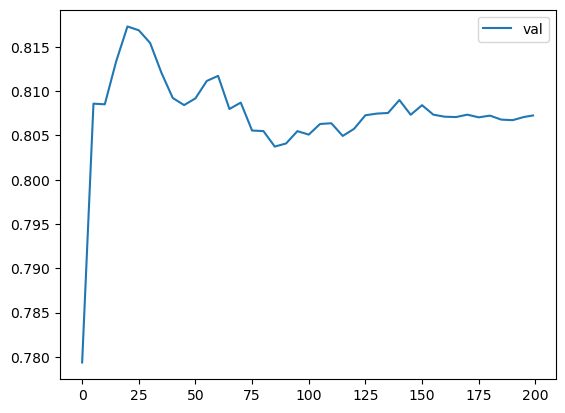

In [99]:
# plt.plot(scores_xgb.iter_num, scores_xgb.train_auc, label='train')
plt.plot(scores_xgb.iter_num, scores_xgb.val_auc, label='val')
plt.legend()
plt.show()

#### Hyperparameter Tuning XGBoost

In [109]:
scores = {}

In [110]:
%%capture output

xgb_params = {
    'eta': 0.01, # learning rate
    'max_depth': 6, # same as decision trees max_depth
    'min_child_weight':1, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals = watchlist)

In [111]:
key = 'eta=%s' % (xgb_params['eta'])

In [112]:
scores[key] = parse_xgb_output(output)

In [113]:
scores.keys()

dict_keys(['eta=0.01'])

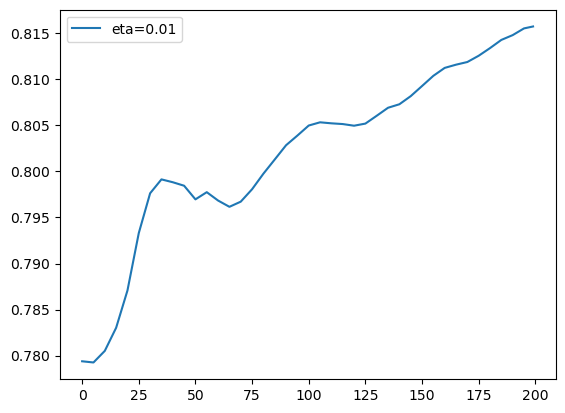

In [105]:
for key, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.val_auc, label=key)
plt.legend()
plt.show()

In [106]:
scores

{'eta=0.01':     iter_num  train_auc  val_auc
 0          0    0.86730  0.77938
 1          5    0.87157  0.77925
 2         10    0.87247  0.78051
 3         15    0.87541  0.78302
 4         20    0.87584  0.78707
 5         25    0.88406  0.79331
 6         30    0.89027  0.79763
 7         35    0.89559  0.79914
 8         40    0.89782  0.79883
 9         45    0.89983  0.79845
 10        50    0.90182  0.79697
 11        55    0.90394  0.79775
 12        60    0.90531  0.79684
 13        65    0.90630  0.79616
 14        70    0.90796  0.79672
 15        75    0.90955  0.79807
 16        80    0.91116  0.79976
 17        85    0.91227  0.80130
 18        90    0.91368  0.80285
 19        95    0.91515  0.80390
 20       100    0.91654  0.80499
 21       105    0.91791  0.80534
 22       110    0.91902  0.80523
 23       115    0.92032  0.80515
 24       120    0.92135  0.80497
 25       125    0.92262  0.80520
 26       130    0.92405  0.80605
 27       135    0.92547  0.80692
 2

In [107]:
plt.figure(figsize=(6,3))

etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.iter_num, df_score.val_auc, label=eta)
plt.legend()
plt.show()

KeyError: 'eta=1.0'

<Figure size 600x300 with 0 Axes>

KeyError: 'eta=0.3'

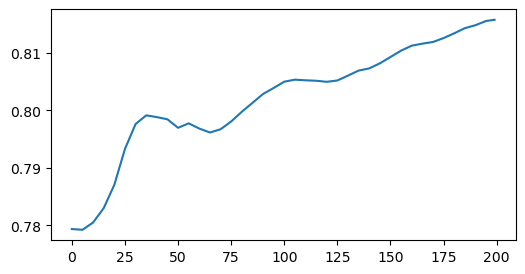

In [108]:
plt.figure(figsize=(6,3))

etas = ['eta=0.01', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.iter_num, df_score.val_auc, label=eta)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6,3))

etas = ['eta=0.01', 'eta=0.05', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.iter_num, df_score.val_auc, label=eta)
plt.legend()
plt.show()

In [114]:
scores = {}

In [121]:
%%capture output

xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 10, # same as decision trees max_depth
    'min_child_weight':1, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [122]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [123]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10'])

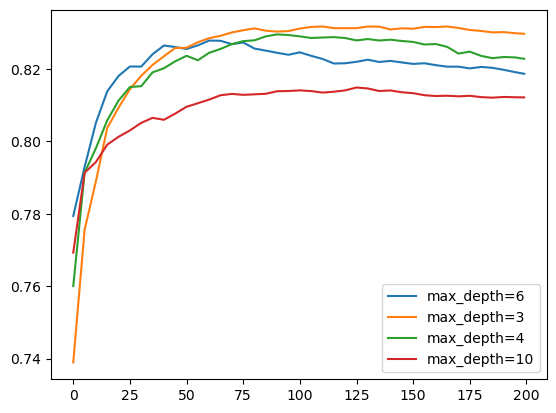

In [124]:
# plt.figure(figsize=(6,3))

for max_depth, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.val_auc, label=max_depth)
plt.legend()
plt.show()

In [125]:
del scores['max_depth=10']

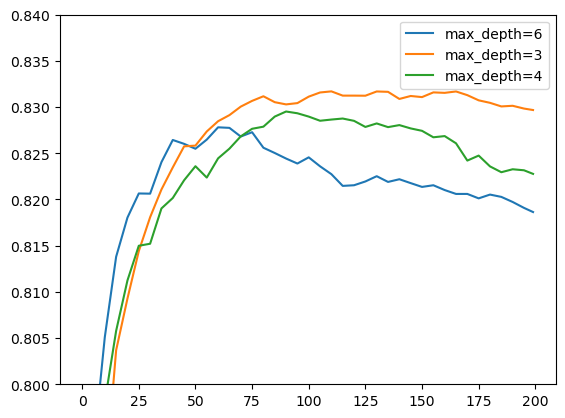

In [126]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.val_auc, label=max_depth)
plt.ylim(0.8, 0.84)
plt.legend()
plt.show()

In [127]:
scores = {}

In [132]:
%%capture output

xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3, # same as decision trees max_depth
    'min_child_weight':30, # same as min_sample_leaf

    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                 verbose_eval=5,
                 evals=watchlist)

In [133]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [134]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

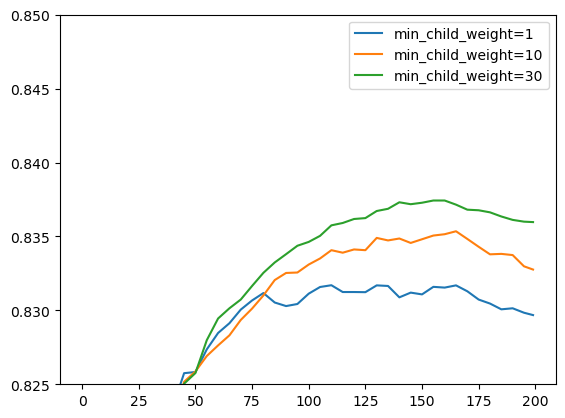

In [136]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.iter_num, df_score.val_auc, label=min_child_weight)
plt.ylim(0.825, 0.85)
plt.legend()
plt.show()

In [137]:
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3, # same as decision trees max_depth
    'min_child_weight':30, # same as min_sample_leaf
    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=160)

#### Selecting the Final Model

In [138]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [142]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7854738320699426

In [140]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10, 
                            min_samples_leaf=3, 
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [143]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [141]:
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3, # same as decision trees max_depth
    'min_child_weight':30, # same as min_sample_leaf
    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=160)

In [144]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8373344070136349

In [146]:
df_full_train = df_full_train.reset_index(drop=True)

In [147]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [148]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [149]:
del df_full_train['status']

In [150]:
dict_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

dict_test = df_test.to_dict(orient='records')
X_test = dv.transform(dict_test)

In [151]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                   feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, 
                    feature_names=list(dv.get_feature_names_out()))

In [152]:
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 3, # same as decision trees max_depth
    'min_child_weight':30, # same as min_sample_leaf
    'objective': 'binary:logistic',
    'eval_metric': 'auc', #evaluation metric. Default is logloss
    'nthread': 2,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=160)

In [153]:
y_pred = model.predict(dtest)

In [154]:
y_pred[:10]

array([0.25886574, 0.23200612, 0.05452344, 0.17633589, 0.33542487,
       0.16194636, 0.00691428, 0.02910427, 0.28786865, 0.23118483],
      dtype=float32)

In [155]:
roc_auc_score(y_test, y_pred)

0.8231269243927472